# Análises para *Projeto Integrado*

## Autores da análise

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------ | :---: |
| Alexandre Lima Freitas   | RM 330376     | `1IA` |
| Ewerton Carlos Assis     | RM 330737     | `1IA` |
| Felipe Ribeiro da Silva  | RM 330332     | `1IA` |
| Gabriel Reis Dias        | RM 330587     | `1IA` |

In [16]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
import os
import json


def get_events_league_json(mapname, leaguename):
    pathname = '{0}/Events'.format(mapname)

    files = os.listdir(pathname)
    objects_str = []
    for filename in files:
        if not filename.startswith(leaguename):
            continue
        filepath = '{0}/{1}'.format(pathname, filename)
        with open(filepath) as f:
            accumulator = ''
            for line in f:
                if line.strip() == '}':
                    accumulator += line.strip()
                    objects_str.append('{0}'.format(accumulator))
                    accumulator = ''
                else:
                    accumulator += line.strip()

    return objects_str


def from_text_to_json_object(text):
    return json.loads(text)

In [18]:
objects = get_events_league_json('de_mirage', 'pro_events')
objects

['{"event": "roundstart","matchid": 16268,"round": 0,"datetime": "2019-03-06T04:14:35.729Z"}',
 '{"event": "attacked","matchid": 16268,"round": 0,"attackerId": 426,"attackerTeam": "T","victimId": 16540,"victimTeam": "C","attackerX": 22,"attackerY": -1546,"attackerZ": -172,"victimX": -27,"victimY": -1543,"victimZ": -168,"weapon": "knife","damage": 55,"damageArmor": 4,"health": 45,"armor": 95,"hitgroup": "generic","datetime": "2019-03-06T04:14:44.682Z"}',
 '{"event": "attacked","matchid": 16268,"round": 0,"attackerId": 16540,"attackerTeam": "C","victimId": 426,"victimTeam": "T","attackerX": -22,"attackerY": -1528,"attackerZ": -168,"victimX": 27,"victimY": -1545,"victimZ": -172,"weapon": "knife","damage": 55,"damageArmor": 4,"health": 45,"armor": 95,"hitgroup": "generic","datetime": "2019-03-06T04:14:44.705Z"}',
 '{"event": "attacked","matchid": 16268,"round": 0,"attackerId": 22078,"attackerTeam": "C","victimId": 120,"victimTeam": "T","attackerX": -4,"attackerY": -1641,"attackerZ": -168,"

In [19]:
objects = get_events_league_json('de_mirage', 'alfa_events')
objects

['{"event": "roundstart","matchid": 12749,"round": 0,"datetime": "2019-01-26T17:43:03.607Z"}',
 '{"event": "attacked","matchid": 12749,"round": 0,"attackerId": 134260,"attackerTeam": "C","victimId": 713405,"victimTeam": "T","attackerX": -755,"attackerY": -1844,"attackerZ": -180,"victimX": -735,"victimY": -1802,"victimZ": -180,"weapon": "knife","damage": 55,"damageArmor": 4,"health": 45,"armor": 95,"hitgroup": "generic","datetime": "2019-01-26T17:43:28.451Z"}',
 '{"event": "attacked","matchid": 12749,"round": 0,"attackerId": 601663,"attackerTeam": "T","victimId": 752238,"victimTeam": "C","attackerX": -661,"attackerY": -1873,"attackerZ": -180,"victimX": -704,"victimY": -1879,"victimZ": -180,"weapon": "knife","damage": 55,"damageArmor": 4,"health": 45,"armor": 95,"hitgroup": "generic","datetime": "2019-01-26T17:43:29.170Z"}',
 '{"event": "attacked","matchid": 12749,"round": 0,"attackerId": 752238,"attackerTeam": "C","victimId": 601663,"victimTeam": "T","attackerX": -693,"attackerY": -1878

In [20]:
objects = get_events_league_json('de_mirage', 'amadora_events')
objects

['{"event": "roundstart","matchid": 16682,"round": 0,"datetime": "2019-03-10T18:47:38.203Z"}',
 '{"event": "attacked","matchid": 16682,"round": 0,"attackerId": 7323,"attackerTeam": "C","victimId": 25088,"victimTeam": "T","attackerX": 10,"attackerY": -1466,"attackerZ": -171,"victimX": 51,"victimY": -1418,"victimZ": -175,"weapon": "knife","damage": 55,"damageArmor": 4,"health": 45,"armor": 95,"hitgroup": "generic","datetime": "2019-03-10T18:47:47.874Z"}',
 '{"event": "attacked","matchid": 16682,"round": 0,"attackerId": 25088,"attackerTeam": "T","victimId": 7323,"victimTeam": "C","attackerX": 39,"attackerY": -1421,"attackerZ": -173,"victimX": 9,"victimY": -1469,"victimZ": -170,"weapon": "knife","damage": 55,"damageArmor": 4,"health": 45,"armor": 95,"hitgroup": "generic","datetime": "2019-03-10T18:47:47.929Z"}',
 '{"event": "attacked","matchid": 16682,"round": 0,"attackerId": 11029,"attackerTeam": "C","victimId": 444788,"victimTeam": "T","attackerX": 50,"attackerY": -1511,"attackerZ": -175

## Análise de ataque e vítima

In [21]:
objects = get_events_league_json('de_mirage', 'pro_events')
objects

['{"event": "roundstart","matchid": 16268,"round": 0,"datetime": "2019-03-06T04:14:35.729Z"}',
 '{"event": "attacked","matchid": 16268,"round": 0,"attackerId": 426,"attackerTeam": "T","victimId": 16540,"victimTeam": "C","attackerX": 22,"attackerY": -1546,"attackerZ": -172,"victimX": -27,"victimY": -1543,"victimZ": -168,"weapon": "knife","damage": 55,"damageArmor": 4,"health": 45,"armor": 95,"hitgroup": "generic","datetime": "2019-03-06T04:14:44.682Z"}',
 '{"event": "attacked","matchid": 16268,"round": 0,"attackerId": 16540,"attackerTeam": "C","victimId": 426,"victimTeam": "T","attackerX": -22,"attackerY": -1528,"attackerZ": -168,"victimX": 27,"victimY": -1545,"victimZ": -172,"weapon": "knife","damage": 55,"damageArmor": 4,"health": 45,"armor": 95,"hitgroup": "generic","datetime": "2019-03-06T04:14:44.705Z"}',
 '{"event": "attacked","matchid": 16268,"round": 0,"attackerId": 22078,"attackerTeam": "C","victimId": 120,"victimTeam": "T","attackerX": -4,"attackerY": -1641,"attackerZ": -168,"

In [22]:
objects = list(map(from_text_to_json_object, objects))
objects

[{'datetime': '2019-03-06T04:14:35.729Z',
  'event': 'roundstart',
  'matchid': 16268,
  'round': 0},
 {'armor': 95,
  'attackerId': 426,
  'attackerTeam': 'T',
  'attackerX': 22,
  'attackerY': -1546,
  'attackerZ': -172,
  'damage': 55,
  'damageArmor': 4,
  'datetime': '2019-03-06T04:14:44.682Z',
  'event': 'attacked',
  'health': 45,
  'hitgroup': 'generic',
  'matchid': 16268,
  'round': 0,
  'victimId': 16540,
  'victimTeam': 'C',
  'victimX': -27,
  'victimY': -1543,
  'victimZ': -168,
  'weapon': 'knife'},
 {'armor': 95,
  'attackerId': 16540,
  'attackerTeam': 'C',
  'attackerX': -22,
  'attackerY': -1528,
  'attackerZ': -168,
  'damage': 55,
  'damageArmor': 4,
  'datetime': '2019-03-06T04:14:44.705Z',
  'event': 'attacked',
  'health': 45,
  'hitgroup': 'generic',
  'matchid': 16268,
  'round': 0,
  'victimId': 426,
  'victimTeam': 'T',
  'victimX': 27,
  'victimY': -1545,
  'victimZ': -172,
  'weapon': 'knife'},
 {'armor': 95,
  'attackerId': 22078,
  'attackerTeam': 'C',
 

In [23]:
df = pd.read_json(json.dumps(objects))

In [24]:
df

,armor,attackerId,attackerTeam,attackerX,attackerY,attackerZ,damage,damageArmor,datetime,event,...,victimId,victimTeam,victimX,victimY,victimZ,weapon,win,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-06 04:14:35.729,roundstart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,95.0,426.0,T,22.0,-1546.0,-172.0,55.0,4.0,2019-03-06 04:14:44.682,attacked,...,16540.0,C,-27.0,-1543.0,-168.0,knife,NaN,NaN,NaN,NaN
2,95.0,16540.0,C,-22.0,-1528.0,-168.0,55.0,4.0,2019-03-06 04:14:44.705,attacked,...,426.0,T,27.0,-1545.0,-172.0,knife,NaN,NaN,NaN,NaN
3,95.0,22078.0,C,-4.0,-1641.0,-168.0,55.0,4.0,2019-03-06 04:14:45.299,attacked,...,120.0,T,23.0,-1593.0,-172.0,knife,NaN,NaN,NaN,NaN
4,90.0,25.0,T,-66.0,-1561.0,-168.0,55.0,4.0,2019-03-06 04:14:45.721,attacked,...,16540.0,C,-80.0,-1602.0,-168.0,knife,NaN,NaN,NaN,NaN
5,NaN,25.0,T,-66.0,-1561.0,-168.0,NaN,NaN,2019-03-06 04:14:45.721,kill,...,16540.0,C,-80.0,-1602.0,-104.0,bayonet,NaN,NaN,NaN,NaN
6,NaN,426.0,T,NaN,NaN,NaN,NaN,NaN,2019-03-06 04:14:45.721,killassist,...,16540.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,90.0,17360.0,C,-31.0,-1587.0,-168.0,55.0,4.0,2019-03-06 04:14:45.947,attacked,...,120.0,T,-11.0,-1543.0,-168.0,knife,NaN,NaN,NaN,NaN
8,NaN,17360.0,C,-31.0,-1587.0,-168.0,NaN,NaN,2019-03-06 04:14:45.947,kill,...,120.0,T,-11.0,-1543.0,-104.0,knife_butterfly,NaN,NaN,NaN,NaN
9,NaN,22078.0,C,NaN,NaN,NaN,NaN,NaN,2019-03-06 04:14:45.947,killassist,...,120.0,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.groupby(['event']).groups.keys()

dict_keys(['attacked', 'blinded', 'defusedthebomb', 'kill', 'killassist', 'killedbomb', 'matchstart', 'mvp', 'plantedthebomb', 'roundendscore', 'roundstart', 'suicide', 'threw'])

In [30]:
df.columns

Index(['armor', 'attackerId', 'attackerTeam', 'attackerX', 'attackerY',
       'attackerZ', 'damage', 'damageArmor', 'datetime', 'event', 'headshot',
       'health', 'hitgroup', 'matchid', 'mode', 'penetrated', 'playerid',
       'reason', 'round', 'team', 'team1', 'team2', 'time', 'type', 'victimId',
       'victimTeam', 'victimX', 'victimY', 'victimZ', 'weapon', 'win', 'x',
       'y', 'z'],
      dtype='object')

In [83]:
dfrroundendscore = df[df.event=='roundendscore']

In [64]:
dfrroundendscore.dropna()

,armor,attackerId,attackerTeam,attackerX,attackerY,attackerZ,damage,damageArmor,datetime,event,...,victimId,victimTeam,victimX,victimY,victimZ,weapon,win,x,y,z


In [84]:
dfrroundendscore = dfrroundendscore.drop(dfrroundendscore.columns[[0,1,2,3,4,5,6,7,10,11,12,15,16,17]], axis=1)

In [86]:
dfrroundendscore = dfrroundendscore.drop(dfrroundendscore.columns[[8,9,10,11,12,13,14,15,17,18,19]], axis=1)

In [87]:
dfrroundendscore

,datetime,event,matchid,mode,round,team,team1,team2,win
35,2019-03-06 04:14:53.900,roundendscore,16268,Terrorists_Win,0.0,T,0.0,1.0,2.0
75,2019-03-06 04:16:39.111,roundendscore,16268,Bomb_Defused,1.0,C,0.0,1.0,2.0
142,2019-03-06 04:17:40.307,roundendscore,16268,CTs_Win,2.0,C,0.0,2.0,2.0
221,2019-03-06 04:19:42.213,roundendscore,16268,Terrorists_Win,3.0,T,1.0,2.0,1.0
287,2019-03-06 04:21:07.886,roundendscore,16268,CTs_Win,4.0,C,1.0,3.0,2.0
397,2019-03-06 04:22:14.612,roundendscore,16268,Terrorists_Win,5.0,T,2.0,3.0,1.0
456,2019-03-06 04:23:46.885,roundendscore,16268,Target_Bombed,6.0,T,3.0,3.0,1.0
507,2019-03-06 04:25:25.206,roundendscore,16268,Terrorists_Win,7.0,T,4.0,3.0,1.0
611,2019-03-06 04:27:03.478,roundendscore,16268,Target_Bombed,8.0,T,5.0,3.0,1.0
665,2019-03-06 04:28:27.362,roundendscore,16268,Terrorists_Win,9.0,T,6.0,3.0,1.0


In [90]:
dfrroundendscore.groupby(['matchid', 'mode','team']).count()

datetime  event  round  team1  team2  win
matchid mode           team                                           
8948    Bomb_Defused   C            4      4      4      4      4    4
        CTs_Win        C            5      5      5      5      5    5
        Target_Bombed  T            7      7      7      7      7    7
        Terrorists_Win T           10     10     10     10     10   10
9484    CTs_Win        C            7      7      7      7      7    7
        Target_Bombed  T            5      5      5      5      5    5
        Terrorists_Win T            8      8      8      8      8    8
11665   CTs_Win        C           16     16     16     16     16   16
        Target_Bombed  T            4      4      4      4      4    4
        Terrorists_Win T            9      9      9      9      9    9
11668   Bomb_Defused   C            1      1      1      1      1    1
        CTs_Win        C           11     11     11     11     11   11
        Target_Bombed  T            2      2      2      2      2    2
        Target_Saved   C            1      1      1      1      1    1
        Terrorists_Win T            5      5      5      5      5    5
11781   CTs_Win        C           11     11     11     11     11   11
        Target_Bombed  T            4      4      4      4      4    4
        Terrorists_Win T           14     14     14     14     14   14
14366   Bomb_Defused   C            7      7      7      7      7    7
        CTs_Win        C            8      8      8      8      8    8
        Target_Bombed  T            3      3      3      3      3    3
        Terrorists_Win T           12     12     12     12     12   12
14383   Bomb_Defused   C            4      4      4      4      4    4
        CTs_Win        C           12     12     12     12     12   12
        Target_Bombed  T            8      8      8      8      8    8
        Target_Saved   C            2      2      2      2      2    2
        Terrorists_Win T           15     15     15     15     15   15
14909   Bomb_Defused   C            5      5      5      5      5    5
        CTs_Win        C           11     11     11     11     11   11
        Target_Bombed  T            2      2      2      2      2    2
        Terrorists_Win T            4      4      4      4      4    4
16268   Bomb_Defused   C            4      4      4      4      4    4
        CTs_Win        C            7      7      7      7      7    7
        Target_Bombed  T            6      6      6      6      6    6
        Terrorists_Win T            8      8      8      8      8    8
16282   Bomb_Defused   C            2      2      2      2      2    2
        CTs_Win        C           14     14     14     14     14   14
        Target_Bombed  T            4      4      4      4      4    4
        Terrorists_Win T            8      8      8      8      8    8

In [123]:
dfrroundendscore.groupby(['mode','team']).count()

,,datetime,event,matchid,round,team1,team2,win
mode,team,,,,,,,
Bomb_Defused,C,27,27,27,27,27,27,27
CTs_Win,C,102,102,102,102,102,102,102
Target_Bombed,T,45,45,45,45,45,45,45
Target_Saved,C,3,3,3,3,3,3,3
Terrorists_Win,T,93,93,93,93,93,93,93


# Ganho por matar todo o time adversario foi o maior modo de ganho entre as duas equipes.

O time que mais ganhou dessa forma foram os CTs

Em seguida a forma mais utilizada para ganho foi a de bomba detonada

In [92]:
dfrroundendscore.groupby(['matchid', 'team']).count()

datetime  event  mode  round  team1  team2  win
matchid team                                                 
8948    C            9      9     9      9      9      9    9
        T           17     17    17     17     17     17   17
9484    C            7      7     7      7      7      7    7
        T           13     13    13     13     13     13   13
11665   C           16     16    16     16     16     16   16
        T           13     13    13     13     13     13   13
11668   C           13     13    13     13     13     13   13
        T            7      7     7      7      7      7    7
11781   C           11     11    11     11     11     11   11
        T           18     18    18     18     18     18   18
14366   C           15     15    15     15     15     15   15
        T           15     15    15     15     15     15   15
14383   C           18     18    18     18     18     18   18
        T           23     23    23     23     23     23   23
14909   C           16     16    16     16     16     16   16
        T            6      6     6      6      6      6    6
16268   C           11     11    11     11     11     11   11
        T           14     14    14     14     14     14   14
16282   C           16     16    16     16     16     16   16
        T           12     12    12     12     12     12   12

In [122]:
dfrroundendscore.groupby(['team']).count()

,datetime,event,matchid,mode,round,team1,team2,win
team,,,,,,,,
C,132,132,132,132,132,132,132,132
T,138,138,138,138,138,138,138,138


In [102]:
dfweapons = df[df.event=='kill'].groupby(['weapon']).count()

In [121]:
dfweapons.sort_values(by=['attackerId'], ascending=False).head(10)

,armor,attackerId,attackerTeam,attackerX,attackerY,attackerZ,damage,damageArmor,datetime,event,...,type,victimId,victimTeam,victimX,victimY,victimZ,win,x,y,z
weapon,,,,,,,,,,,,,,,,,,,,,
ak47,0,704,704,704,704,704,0,0,704,704,...,0,704,704,704,704,704,0,0,0,0
aug,0,252,252,252,252,252,0,0,252,252,...,0,252,252,252,252,252,0,0,0,0
awp,0,186,186,186,186,186,0,0,186,186,...,0,186,186,186,186,186,0,0,0,0
m4a1,0,149,149,149,149,149,0,0,149,149,...,0,149,149,149,149,149,0,0,0,0
usp_silencer,0,101,101,101,101,101,0,0,101,101,...,0,101,101,101,101,101,0,0,0,0
glock,0,66,66,66,66,66,0,0,66,66,...,0,66,66,66,66,66,0,0,0,0
deagle,0,61,61,61,61,61,0,0,61,61,...,0,61,61,61,61,61,0,0,0,0
ump45,0,56,56,56,56,56,0,0,56,56,...,0,56,56,56,56,56,0,0,0,0
mp9,0,33,33,33,33,33,0,0,33,33,...,0,33,33,33,33,33,0,0,0,0


# Arma que mais matou foi a ak47

In [124]:
df[df.headshot==1].groupby(['attackerTeam']).count()

,armor,attackerId,attackerX,attackerY,attackerZ,damage,damageArmor,datetime,event,headshot,...,victimId,victimTeam,victimX,victimY,victimZ,weapon,win,x,y,z
attackerTeam,,,,,,,,,,,,,,,,,,,,,
C,0,380,380,380,380,0,0,380,380,380,...,380,380,380,380,380,380,0,0,0,0
T,0,422,422,422,422,0,0,422,422,422,...,422,422,422,422,422,422,0,0,0,0


# Time com mais headshot mais possibilidade de ganho

In [172]:
use_colours = {"T": "red", "C": "blue"}
position = df[df.columns[[2, 3,4]]]
position = position.dropna()
position

,attackerTeam,attackerX,attackerY
1,T,22.0,-1546.0
2,C,-22.0,-1528.0
3,C,-4.0,-1641.0
4,T,-66.0,-1561.0
5,T,-66.0,-1561.0
7,C,-31.0,-1587.0
8,C,-31.0,-1587.0
10,T,35.0,-1622.0
11,T,45.0,-1654.0
12,T,45.0,-1654.0


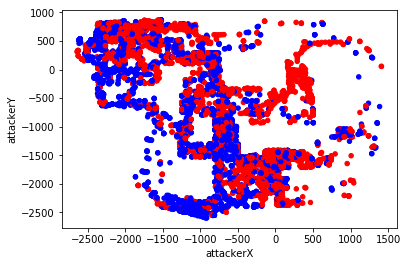

In [173]:
use_colors = {"T": "red", "C": "blue"}

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111)

position.plot.scatter(x='attackerX', y='attackerY', c=[use_colors[x[0]] for x in position.attackerTeam])

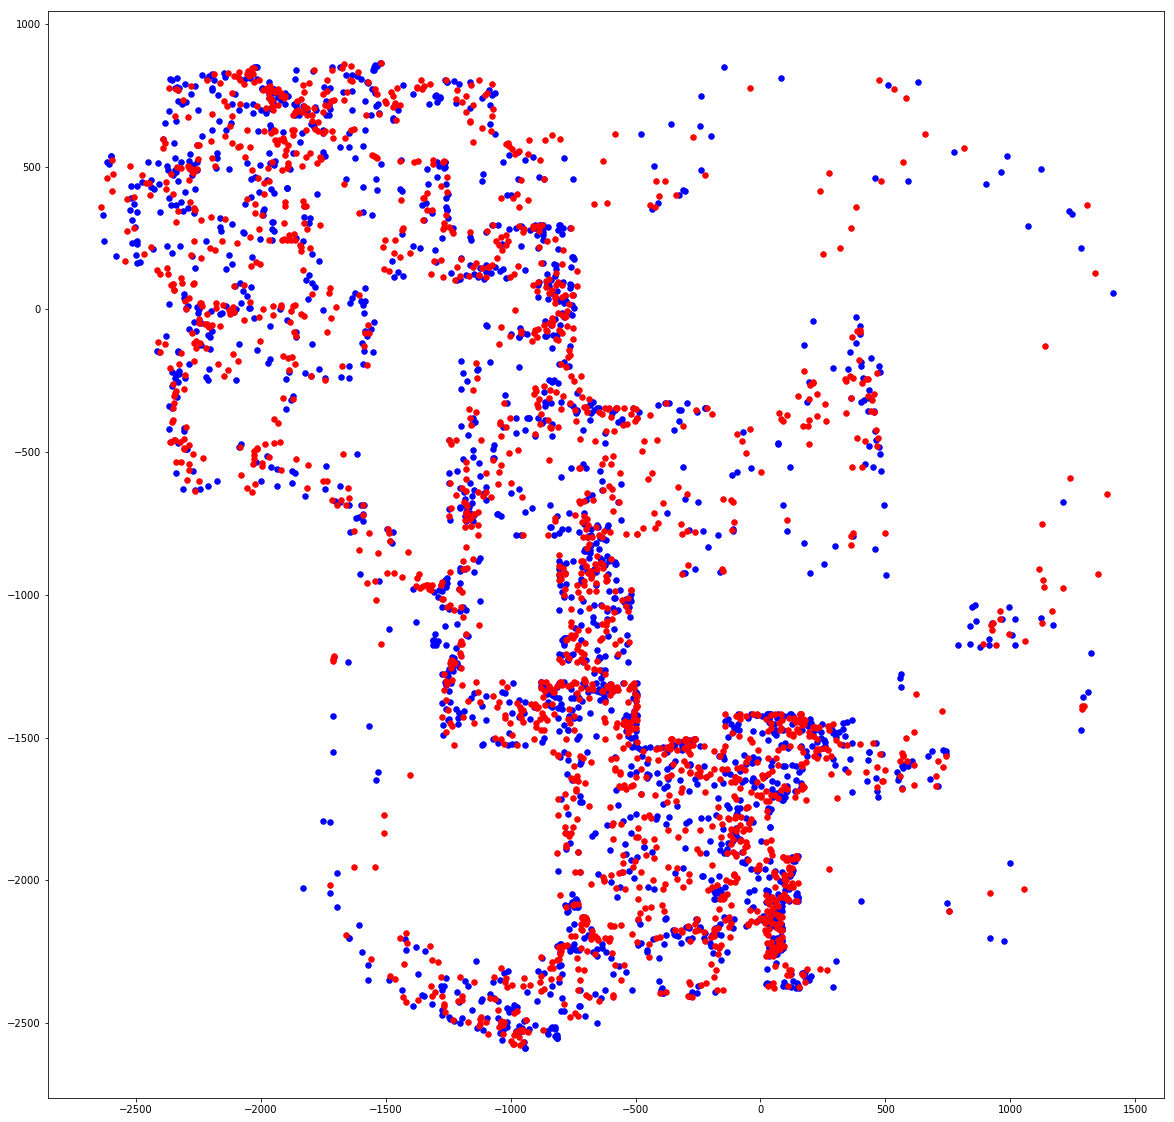

In [188]:
use_colours = {"kill": "green", "killed": "red"}

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111)

killer_position = df[df.event=='kill'][df.columns[[2,3,4,26,27]]]
killer_position = killer_position.dropna()
ax1.scatter(x=killer_position['attackerX'], y=killer_position['attackerY'], c='blue', s=30)
ax1.scatter(x=killer_position['victimX'], y=killer_position['victimY'], c='red', s=30)
plt.show()

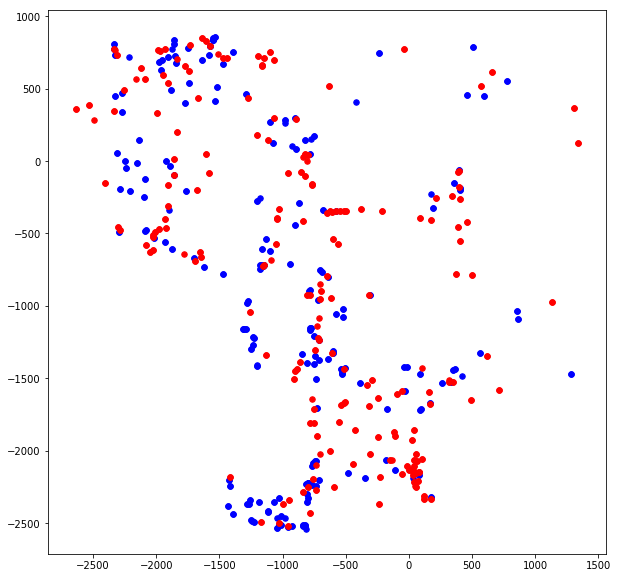

In [201]:
use_colours = {"kill": "green", "killed": "red"}

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

awp = df[df.weapon=='awp'][df.columns[[2,3,4,26,27]]]
awp = awp.dropna()
ax1.scatter(x=awp['attackerX'], y=awp['attackerY'], c='blue', s=30)
ax1.scatter(x=awp['victimX'], y=awp['victimY'], c='red', s=30)
plt.show()

In [199]:
df[df["weapon"].str.contains("awp")]

ValueError: cannot index with vector containing NA / NaN values